# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Set style and font size
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

df = pd.read_csv('goodreads_data.csv')

In [2]:
# convert num_ratings from str to int
df["Num_Ratings"] = df["Num_Ratings"].str.replace(',','')
df["Num_Ratings"] = df["Num_Ratings"].astype(int)

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

C:\Users\johan\AppData\Local\Temp\ipykernel_3532\1234022993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


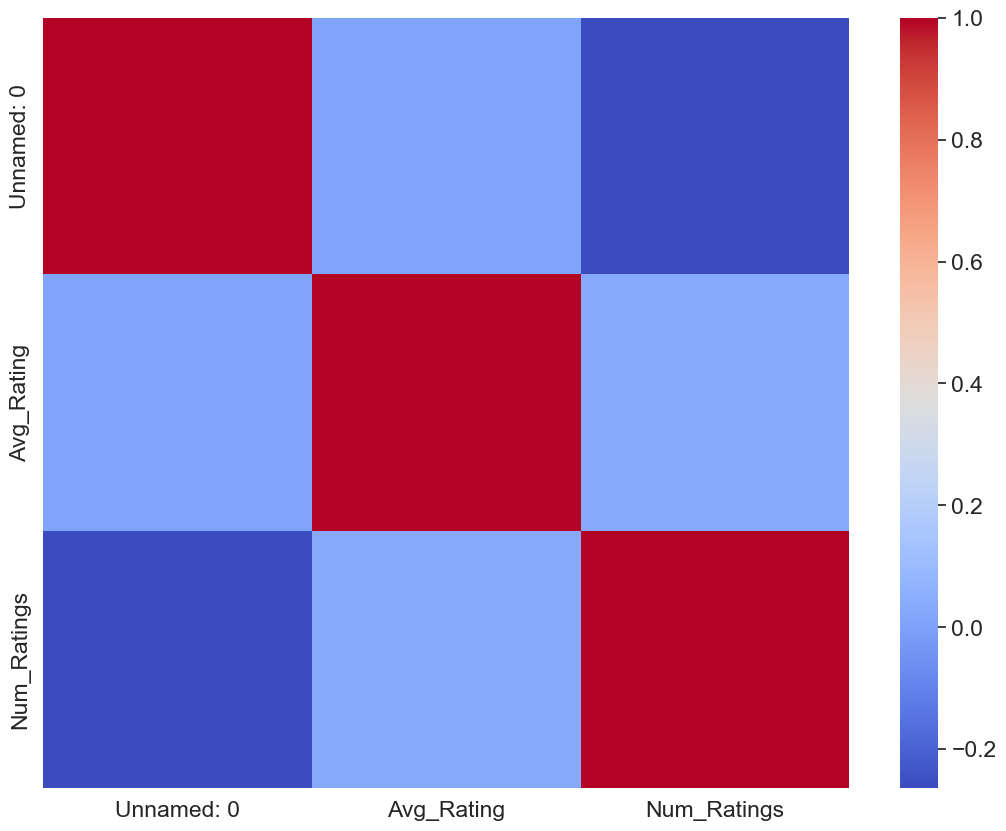

In [3]:
corr = df.corr()
_, ax = plt.subplots(figsize=(13,10)) 

# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

C:\Users\johan\AppData\Local\Temp\ipykernel_3532\1344996239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)


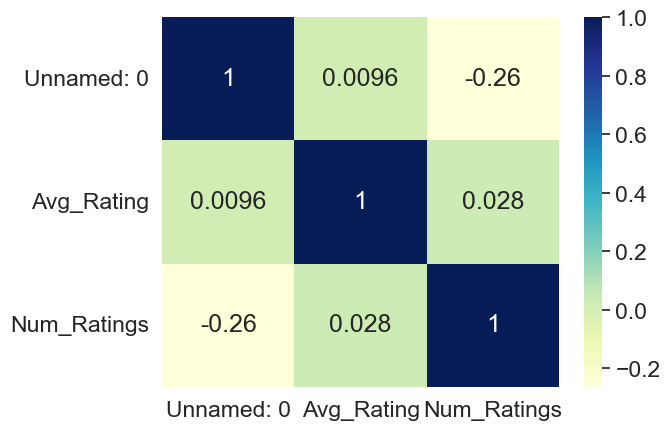

In [4]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [5]:
df.columns

Index(['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')

In [6]:
# sns.pairplot(df, x_vars=['Avg_Rating','Num_Ratings'], 
#              y_vars='Avg_Rating', height=4, aspect=1, kind='scatter')
# plt.show()

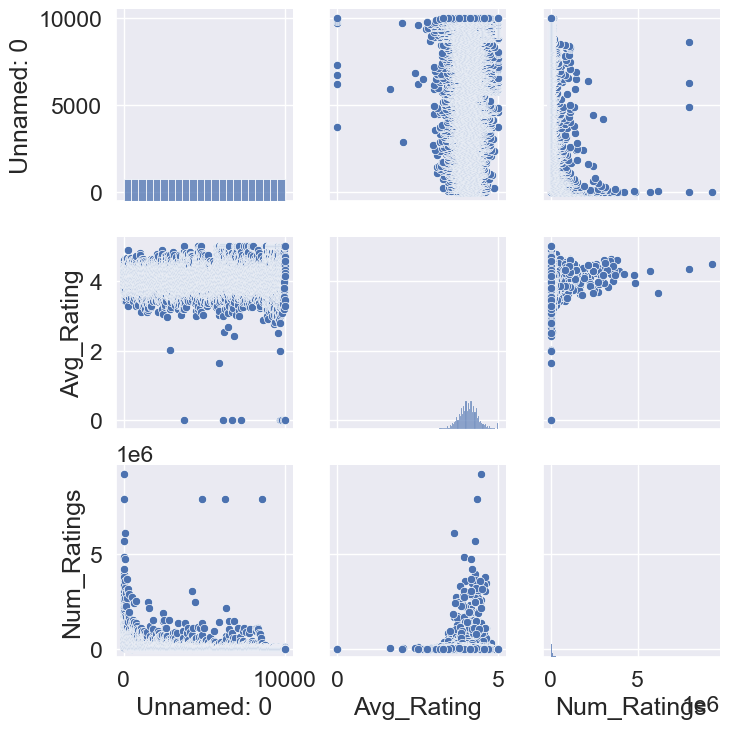

In [7]:
sns.pairplot(df)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [9]:
# Creating X and y
X = df['Avg_Rating']
y = df['Num_Ratings']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train

1191     23858
4458    513175
1131     58611
9562      1049
6579     63753
         ...  
350      88484
79      918431
8039      7892
6936     86893
5640      4435
Name: Num_Ratings, Length: 7000, dtype: int32

In [10]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Num_Ratings   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.882
Date:                Fri, 27 Oct 2023   Prob (F-statistic):             0.0488
Time:                        16:29:11   Log-Likelihood:                -98623.
No. Observations:                7000   AIC:                         1.973e+05
Df Residuals:                    6998   BIC:                         1.973e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -121.1542   4.62e+04     -0.003      0.998   -9.07e+04    9.04e+04
Avg_Rating  2.229e+04   1.13e+04      1.970      0.049     113.992    4.45e+04
==============================================================================
Omnibus:                    12091.687   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13978795.623
Skew:                          12.009   Prob(JB):                         0.00
Kurtosis:                     220.602   Cond. No.                         52.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

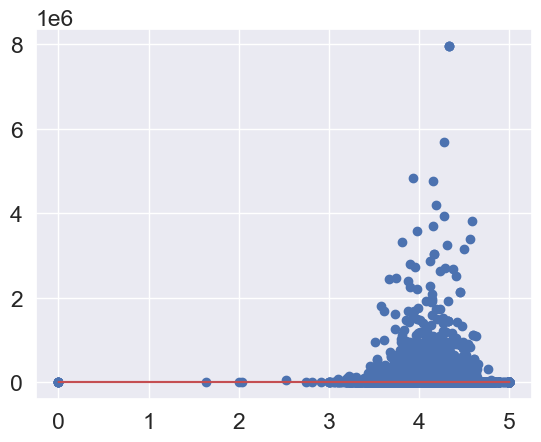

In [11]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 10.4310 + 13.8817*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

C:\Users\johan\AppData\Local\Temp\ipykernel_3532\3336180004.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


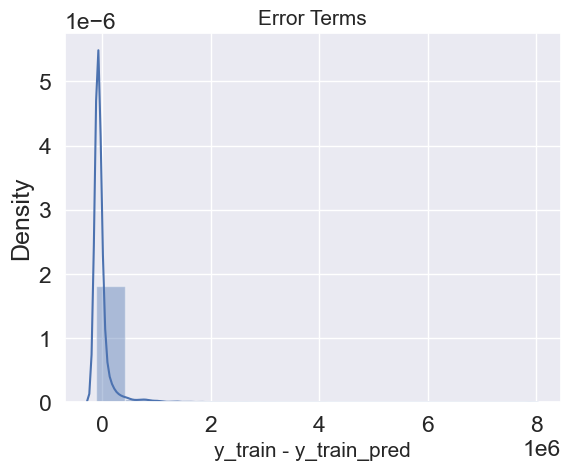

In [12]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.001
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really